##### 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, test_input.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)


In [2]:
print(type(train_input))
print(type(train_input[0]))

<class 'numpy.ndarray'>
<class 'list'>


In [3]:
# 첫번째 리뷰
print(len(train_input[0]))

218


첫 번째 리뷰의 길이는 218개의 토큰(단어개수)

In [4]:
# 두번째 리뷰
print(len(train_input[1]))

189


두 번째 리뷰의 길이는 189개의 토큰

=> 리뷰마다 길이 다름

In [5]:
import numpy as np
np.unique(train_input[0], return_counts=True)

(array([  1,   2,   4,   5,   6,   7,   8,   9,  12,  13,  14,  15,  16,
         17,  18,  19,  21,  22,  25,  26,  28,  30,  32,  33,  35,  36,
         38,  39,  43,  46,  48,  50,  51,  52,  56,  62,  65,  66,  71,
         76,  77,  82,  87,  88,  92,  98, 100, 103, 104, 106, 107, 112,
        113, 117, 124, 130, 134, 135, 141, 144, 147, 150, 167, 172, 173,
        178, 192, 194, 215, 224, 226, 256, 283, 284, 297, 316, 317, 336,
        381, 385, 386, 400, 407, 447, 458, 469, 476, 480]),
 array([ 1, 40, 15,  9,  3,  2,  3,  1,  6,  3,  3,  4, 11,  3,  3,  2,  1,
         6,  4,  3,  2,  1,  3,  2,  1,  4,  4,  1,  4,  1,  1,  2,  2,  1,
         1,  1,  2,  2,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,
         2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
         1,  1,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  2,  3]))

어휘사전에 500개(0~499)의 단어들 (중복단어 있음)

* 어휘사전에 없는 단어 = 2 (40개)

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


리뷰 - 긍정(1), 부정(0)  => 이진 분류

In [7]:
# 20000개 훈련셋
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state=42)

In [8]:
lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


평균 단어 개수는 239개 > 중간값은 178  

=> 한쪽으로 치우친 분포

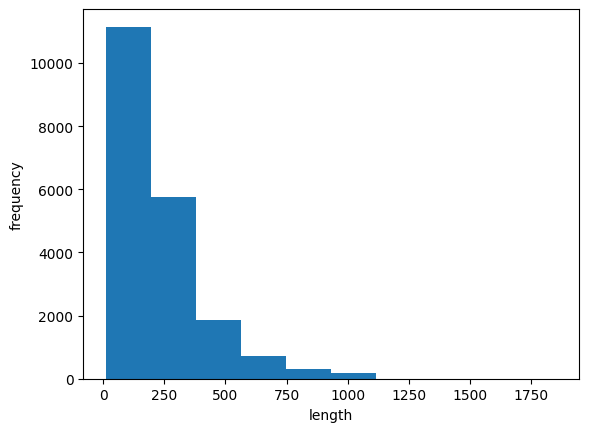

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
# 길이가 100개인 단어만 사용(패딩)
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
print(train_seq.shape)

(20000, 100)


In [11]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


0(패딩)값이 없으므로 100보다는 길었을 것이다.

In [12]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [13]:
print(train_seq[5]) # 100개

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [14]:
print(train_input[5]) # 96개

[1, 2, 195, 19, 49, 2, 2, 190, 4, 2, 352, 2, 183, 10, 10, 13, 82, 79, 4, 2, 36, 71, 269, 8, 2, 25, 19, 49, 7, 4, 2, 2, 2, 2, 2, 10, 10, 48, 25, 40, 2, 11, 2, 2, 40, 2, 2, 5, 4, 2, 2, 95, 14, 238, 56, 129, 2, 10, 10, 21, 2, 94, 364, 352, 2, 2, 11, 190, 24, 484, 2, 7, 94, 205, 405, 10, 10, 87, 2, 34, 49, 2, 7, 2, 2, 2, 2, 2, 290, 2, 46, 48, 64, 18, 4, 2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

#### 순환신경망(RNN)모델 만들기

In [16]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape = (100, 500))) # (샘플의 개수, load_data()시 사용한 단어 개수(num_words))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
# 원핫인코딩으로 변경
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
print(train_oh.shape)

(20000, 100, 500)


In [19]:
# train_seq[0](첫번째 샘플)의 첫번째 토큰 = 10
print(train_oh[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [20]:
val_oh = keras.utils.to_categorical(val_seq)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


##### 순환신경망 훈련하기

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data = (val_oh, val_target),
                    callbacks = [checkpoint_cb, early_stopping_cb])

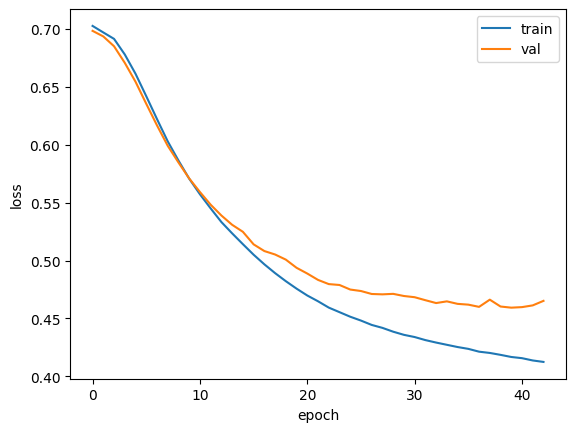

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [24]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


원핫인코딩(train_oh)을 하면 입력데이터가 엄청 커짐

##### 단어 임베딩

In [25]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
EarlyStopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data = (val_seq, val_target),
                     callbacks=[checkpoint_cb, EarlyStopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 30ms/step - loss: 0.6937 - accuracy: 0.5115 - val_loss: 0.6937 - val_accuracy: 0.5136
Epoch 2/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6887 - accuracy: 0.5401 - val_loss: 0.6917 - val_accuracy: 0.5244
Epoch 3/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6844 - accuracy: 0.5610 - val_loss: 0.6899 - val_accuracy: 0.5338
Epoch 4/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6800 - accuracy: 0.5760 - val_loss: 0.6879 - val_accuracy: 0.5382
Epoch 5/100
313/313 [==============================] - 9s 30ms/step - loss: 0.6750 - accuracy: 0.5872 - val_loss: 0.6862 - val_accuracy: 0.5440
Epoch 6/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6699 - accuracy: 0.5978 - val_loss: 0.6838 - val_accuracy: 0.5506
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6647 - accuracy: 0.6084 - val_loss: 0.6829 - val_accuracy

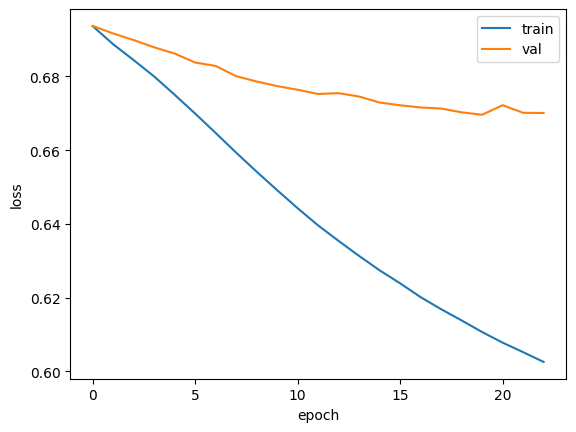

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()